In [1]:
# Import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Defines Global Variables data entries
TOTAL_DATA = 150

# Splits data into training(80%) and testing(20%)
TRAINING_DATA = int(TOTAL_DATA*0.8) 
TESTING_DATA = int(TOTAL_DATA*0.2)

# Number of input features
FEATURE_NUMBER = 4

# Number of classes and respective indexing
CLASS_NUMBER = 3
CLASSNAMES = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [3]:
# Read in data
data = pd.read_csv('../../DataSets/Iris.csv')

#Splits into 2 classes instead of 3
#data = data[0:100]

# Shuffle data
data = data.sample(frac = 1)

data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
128,129,6.4,2.8,5.6,2.1,Iris-virginica
22,23,4.6,3.6,1.0,0.2,Iris-setosa
68,69,6.2,2.2,4.5,1.5,Iris-versicolor
56,57,6.3,3.3,4.7,1.6,Iris-versicolor
21,22,5.1,3.7,1.5,0.4,Iris-setosa


In [4]:
# Pulling feature data and splicing it for training/testing using 80-20 ratio
x_train = data.iloc[:TRAINING_DATA, 1:FEATURE_NUMBER+1].values
x_test = data.iloc[TRAINING_DATA:, 1:FEATURE_NUMBER+1].values

# Standardizes the data by dividing the entries by standard deviation (i.e calculating how many standard deviations the entries are from the center)
x_train = (x_train - np.mean(x_train, axis=0)) / np.std(x_train, axis=0)
x_test = (x_test - np.mean(x_test, axis=0)) / np.std(x_test, axis=0)

# Reshape for matrix multiplication
x_train = x_train.reshape(FEATURE_NUMBER, TRAINING_DATA)
x_test = x_test.reshape(FEATURE_NUMBER, TESTING_DATA)



In [5]:
# Pulling label data and splicing it for training/testing using 80-20 ratio
y_train_data = data.iloc[:TRAINING_DATA, -1].values
y_test_data = data.iloc[TRAINING_DATA:, -1].values

# Create vectorized representations of each data point's class membership
y_train = np.zeros(shape=(CLASS_NUMBER, TRAINING_DATA))
y_test = np.zeros(shape=(CLASS_NUMBER, TESTING_DATA))

# Setting numeric labels for each data point's class
for row in range(CLASS_NUMBER):
    y_train[row, :TRAINING_DATA]  = [ele == CLASSNAMES[row] for ele in y_train_data]
    y_test[row, :TESTING_DATA] = [ele == CLASSNAMES[row] for ele in y_test_data]

In [6]:
# Randomly initialize weights and bias matricies
w = np.random.rand(CLASS_NUMBER, FEATURE_NUMBER)
b = np.random.rand(CLASS_NUMBER, 1)



In [7]:
#Class coresspondance function, returns a vector (z), which will be input into softmax function
#The highest number in z represents the correct class
def class_corr(weights, bias, x):
    
    numData = x.shape[1]
    #print(numData)
    z = weights.dot(x)
    #print(z)
    for input in range(numData):
        z[0:CLASS_NUMBER, input:input+1] += bias

    return z

z = class_corr(w, b, x_test)
print(z)



[[-8.38618516e-01 -1.24660716e+00 -1.11810372e-01  9.38612442e-01
  -1.62123519e+00 -4.91255633e-01  3.33379051e-01 -1.21407947e+00
   7.07402654e-01  6.06315724e-01  3.18140709e-01 -5.14702893e-01
   1.37894879e+00  2.43732276e-01  9.94909608e-01 -1.18496546e+00
   2.15224356e-01  1.20970185e+00 -2.18643529e-01 -1.30530188e+00
   1.02456180e+00  5.02623224e-01  4.27516585e-01 -3.96493735e-01
   1.28231025e+00  5.79341620e-01  5.02156938e-01 -3.61700576e-01
  -2.13271710e-01  4.13482200e-01]
 [-2.23180948e-01 -9.17156898e-01  1.01515234e+00  1.16257792e+00
  -1.22179087e+00  9.16018807e-01  1.14261367e-01 -4.11856384e-01
   6.18575020e-01  4.97525909e-01  4.47464971e-01  1.48129956e-02
   2.20523999e+00 -5.01966229e-01  2.03539441e+00  1.45541235e-01
   2.49260131e-01  3.05903268e+00 -4.46576865e-01 -1.59611780e+00
   1.36017420e+00 -3.39782199e-03  1.55629274e+00  4.96291750e-01
   2.47497550e+00  1.78191633e+00  1.20210627e+00  8.31011594e-01
  -6.81503163e-01  1.18813327e+00]
 [-1.6

In [8]:
#Softmax Function
#expnentiates all elements of the z vector and divides by their sum to see class probability
def softmax(z):

    #creates empty probability array
    y_hat = np.empty([z.shape[0], z.shape[1]])
    numData = z.shape[1]

    #exponentiates the matrix
    z_exp = np.exp(z)

    #Converts z vector into probability distribution
    for input in range(numData):
        z_sum = np.sum(z_exp[0:CLASS_NUMBER, input:input+1])
        y_hat[0:CLASS_NUMBER, input:input+1] = z_exp[0:CLASS_NUMBER, input:input+1]/z_sum
    return y_hat


y_pred = softmax(z)
print(softmax(z))


[[0.30198756 0.25602113 0.15350931 0.35569821 0.05490223 0.08547411
  0.29687801 0.04329201 0.43743905 0.32313857 0.44037346 0.27334759
  0.2565831  0.50459668 0.15121253 0.08573243 0.27582073 0.09680823
  0.2993837  0.34453355 0.24250501 0.32657248 0.10166431 0.17938188
  0.17422676 0.04674969 0.30747818 0.16845567 0.51050662 0.26246075]
 [0.55881774 0.35592152 0.47377092 0.44498836 0.08185901 0.34914522
  0.23846049 0.09656256 0.40025817 0.2898291  0.50117102 0.46417429
  0.58624852 0.23938208 0.42802051 0.32432232 0.28537009 0.61527099
  0.23836252 0.25759164 0.33921522 0.19688718 0.31433287 0.43803659
  0.57422594 0.15561459 0.61915365 0.55523131 0.31963258 0.56949649]
 [0.1391947  0.38805735 0.37271977 0.19931344 0.86323876 0.56538068
  0.46466151 0.86014543 0.16230278 0.38703233 0.05845552 0.26247812
  0.15716838 0.25602123 0.42076696 0.58994525 0.43880917 0.28792078
  0.46225378 0.39787481 0.41827977 0.47654034 0.58400282 0.38258153
  0.2515473  0.79763571 0.07336816 0.27631302 

In [9]:
#Loss function
#Returns the sum of all probabilities compared to the actual class
def cost(y, y_pred):

    total_loss = 0

    #Finds number of data samples
    numData = y.shape[1]

    #Manipulates y_pred into right form for the loss function
    y_pred = -1*np.log(y_pred)

    #iterates over all data samples
    for column in range(numData):

        #Computes total class loss for each data sample and sums them
        y_cur = y[0:CLASS_NUMBER, column:column+1].transpose()
        y_pred_cur = (y_pred[0:CLASS_NUMBER, column:column+1])
        total_loss += y_cur.dot(y_pred_cur)[0][0]

    #Divdes by number of data samples to find average error
    total_loss = total_loss/numData
    return total_loss
    
    

        



cost(y_test, y_pred)

1.5561684138064948

In [10]:
# Take the gradients of the loss with respect to weights and bias
def findGradients(x, y, y_pred):
    # Number of data samples
    numData = x.shape[1]

    # Calculate error for gradient computations
    error = y_pred - y
    error = error.transpose()
    

    # Dictionary for holding gradient values
    gradientDict = dict()
    gradientDict['gradWeights'] = np.array((1/numData) * x.dot(error))
    gradientDict['gradBias'] =  ((1/numData) * error.sum(axis=0)).reshape(1, CLASS_NUMBER)
    
    return gradientDict

y_pred = softmax(z)
findGradients(x_test, y_test, y_pred)

{'gradWeights': array([[ 0.01125636,  0.12941935, -0.14067571],
        [ 0.14703669, -0.02023327, -0.12680341],
        [-0.20926321,  0.14046819,  0.06879502],
        [-0.29270888, -0.14770224,  0.44041112]]),
 'gradBias': array([[-0.15477555,  0.04371178,  0.11106377]])}

In [11]:
# Repetitively perform gradient descent to improve model 
def gradientDescent(x, y, weights, bias, losses, max_iter, learning_rate, coeff_momentum):
    #Intializes starting variables and matricies which will get updated during momentum calculation
    old_grad_weights = np.zeros(shape=(FEATURE_NUMBER, CLASS_NUMBER))
    old_grad_bias = np.zeros(shape=(1, CLASS_NUMBER))

    momentum_grad_weights = np.zeros(shape=(FEATURE_NUMBER, CLASS_NUMBER))
    momentum_grad_bias = np.zeros(shape=(1, CLASS_NUMBER))

    for i in range(max_iter): 
        z = class_corr(weights, bias, x)
        #print(z.shape)
        y_pred = softmax(z)
        gradients = findGradients(x, y, y_pred)

        #Calculates Momentum
        momentum_grad_weights = coeff_momentum * momentum_grad_weights + (1-coeff_momentum) * old_grad_weights
        momentum_grad_bias = coeff_momentum * momentum_grad_bias + (1-coeff_momentum) * old_grad_bias
        
        # Compute gradient descent
        weights = weights - (learning_rate * momentum_grad_weights.transpose())
        bias = bias - (learning_rate * momentum_grad_bias.transpose())
       
        #Updates the old gradients for weights and bias
        old_grad_weights = gradients["gradWeights"]
        old_grad_bias = gradients["gradBias"]

        # Not required - meant to visualize model's performance
        loss = cost(y, y_pred)
        losses.append(loss)

        learning_rate *= 0.95

    return weights, bias


In [12]:
# List for storing log loss over time
losses = []

w, b = gradientDescent(x_train, y_train, w, b, losses, max_iter=50, learning_rate=0.1, coeff_momentum=0.9)

#print(w)
#print(b)

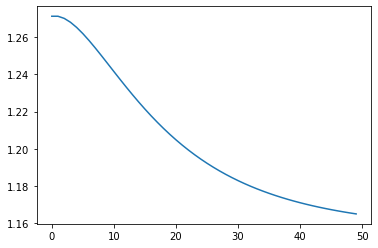

In [13]:
plt.plot(losses)

In [14]:
# Calculates accuracy of test data
def accuracy(y, y_pred):

    total_correct = 0
    confusion_matrix = np.zeros(shape=(CLASS_NUMBER, CLASS_NUMBER))

    numData = y.shape[1]
    
    # Iterating through all of data
    for data in range(numData):
        # Returns array for index of max probabilities for each data point 
        y_indexes = np.argmax(y, axis=0)
        y_pred_indexes = np.argmax(y_pred, axis=0)
        
        confusion_matrix[y_indexes[data]][y_pred_indexes[data]] += 1
        total_correct = np.sum(y_indexes == y_pred_indexes)
        
    total_accuracy = total_correct/numData
    return confusion_matrix, total_accuracy 


In [15]:
# Accuracy and confusion matrix check
z = class_corr(w, b, x_test)
y_pred = softmax(z)

confusion_matrix, model_acc = accuracy(y_test, y_pred)

print(confusion_matrix)
print(model_acc)


[[2. 4. 6.]
 [1. 4. 5.]
 [3. 4. 1.]]
0.23333333333333334
